# Popular Data Science Questions

Working for a company that creates data science content (books, inlines articles, videos or interactive text-based), our goal it's to find out what is the best content to write about. We're going to investigate on internet especially [Data Science Stack Exchange(DSSE)](https://datascience.stackexchange.com/?newreg=24b3261d9a8e4e90beb7652e0d1ecc25) to know which content should create, based on interest by subject.
##### 1- What kind of questions are welcome on this site? 
We have :
- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.
In the help center we also learned that in addition to the sites mentioned in the *Learn section*, there are other two sites that are relevant:
- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)
##### 2- What, other than questions, does DSSE's subdivide into?
On the [home page](https://datascience.stackexchange.com) we can see that we have four sections:
- Questions — a list of all questions asked;
- Tags — a list of tags (keywords or labels that categorize questions);
- Users — a list of users;
- Unanswered — a list of unanswered questions;
The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.
Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.
##### 3- What information is available in each post?
Looking, just as an example, at [this question](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1), some of the information we see is:
- For both questions and answers:
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
    - For questions only:
- How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags;
## Stack Exchange Data Explorer
Stack Exchange provides a public data base for each of its websites [here](https://data.stackexchange.com/datascience/query/new). After investigating the data base, this is the tables to help us to achieve our goal:
- Posts
- PostTags
- Tags
- TagSynonyms
## Getting the Data
In the posts table , we're going to be focus on :
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.

![differents type](postType.png)
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).
About *PostTypeId* we have differents types of post. Let's find out what's relevant for us .

![nbr post](postType_post.png)

Our focus it's about the questions and by the result above we can see the *PostTypeId:1* what it's question have a lot of data. On top of that we'll use only the post of 2019.

![result](query_data.png)

## Exploring the Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
questions = pd.read_csv('2019_questions.csv',parse_dates=["CreationDate"])
questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60567,1,2019-09-22 00:37:54,2,26,<natural-language-process>,1,NaN
1,60569,1,2019-09-22 00:49:19,3,201,<tensorflow><lstm><training>,2,NaN
2,60571,1,2019-09-22 02:33:04,1,85,<random-forest><xgboost>,0,NaN
3,60572,1,2019-09-22 03:29:31,0,51,<machine-learning><keras><perceptron>,0,NaN
4,60574,1,2019-09-22 07:59:19,0,49,<machine-learning><kernel><mathematics>,1,NaN


In [2]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6777 non-null   int64         
 1   PostTypeId     6777 non-null   int64         
 2   CreationDate   6777 non-null   datetime64[ns]
 3   Score          6777 non-null   int64         
 4   ViewCount      6777 non-null   int64         
 5   Tags           6777 non-null   object        
 6   AnswerCount    6777 non-null   int64         
 7   FavoriteCount  1601 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 423.7+ KB


By the dataset info , we have **6777 rows** and **1601** missing values in *FavoriteCount* column. *FavoriteCount* column means How many times the question was favored so if we have missing values in this column, we can infer that it never been added as favorite, we can fill it by **0** . 
Let's see the type of *Tags* column values. 

In [3]:
questions["Tags"].apply(lambda tag : type(tag)).unique()

array([<class 'str'>], dtype=object)

Every value in the *Tags* column is string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/questions/18878/how-do-i-correctly-tag-my-questions/18879#18879)), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.
However, since doesn't help is relating tags from one question to another, we'll just keep them as a list. 

## Cleaning the Data

In [4]:
#Cleaning FavoriteCont column
questions["FavoriteCount"].fillna(0, inplace=True)
# Change the type of the column
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
# Clean the Tags column
questions["Tags"] = questions["Tags"].str.replace("^<|>$","", regex=True).str.split("><")
questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60567,1,2019-09-22 00:37:54,2,26,[natural-language-process],1,0
1,60569,1,2019-09-22 00:49:19,3,201,"[tensorflow, lstm, training]",2,0
2,60571,1,2019-09-22 02:33:04,1,85,"[random-forest, xgboost]",0,0
3,60572,1,2019-09-22 03:29:31,0,51,"[machine-learning, keras, perceptron]",0,0
4,60574,1,2019-09-22 07:59:19,0,49,"[machine-learning, kernel, mathematics]",1,0


In [5]:
# See the types
questions.dtypes

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

## Most Used VS Most Viewed
Now we are focus on determining the most popular tag . This is our different popularity proxies : 
- Count how many times each tag was used
- Count how many times each tag was viewed

In [6]:
# Count how many times each tag was used
tagUsed = {}
def countUse(tags):
    for tag in tags :
        tagUsed[tag] = tagUsed[tag] + 1 if tag in tagUsed else 1

questions["Tags"].apply(countUse)

# Transform our result to DataFrame
tagUsed = pd.DataFrame.from_dict(tagUsed, orient='index')
tagUsed.head()

,0
natural-language-process,90
tensorflow,413
lstm,290
training,108
random-forest,133


In [7]:
#rename the columns of the dataFrame to be more readable 
tagUsed.rename(columns={0:"Count"}, inplace=True)

In [8]:
# Count how many times each tag was viewed
tagView = {}
for index, row in questions.iterrows():
    tags = row["Tags"]
    for tag in tags:
        view = row["ViewCount"]
        tagView[tag] = tagView[tag] + view if tag in tagView else view
# Transform our result to DataFrame
tagView = pd.DataFrame.from_dict(tagView, orient='index')
#rename the columns of the dataFrame to be more readable 
tagView.rename(columns={0:"ViewCount"}, inplace=True)
tagView.head()

,ViewCount
natural-language-process,35750
tensorflow,425743
lstm,228411
training,67389
random-forest,67628


Now we have the data about our different proxies, let's visualize them to have a good understanding. For it , we're going to keep only the **Top 20** of our proxies.

In [9]:
most_used = tagUsed.sort_values(by="Count").tail(20)
most_used

,Count
data-mining,173
feature-selection,175
r,193
predictive-modeling,213
clustering,229
dataset,250
regression,270
lstm,290
pandas,315
time-series,337


In [10]:
most_viewed = tagView.sort_values(by="ViewCount").tail(20)
most_viewed

,ViewCount
xgboost,126662
dataset,132478
csv,143968
pytorch,148515
regression,155078
numpy,192945
time-series,211704
lstm,228411
nlp,262273
cnn,275472


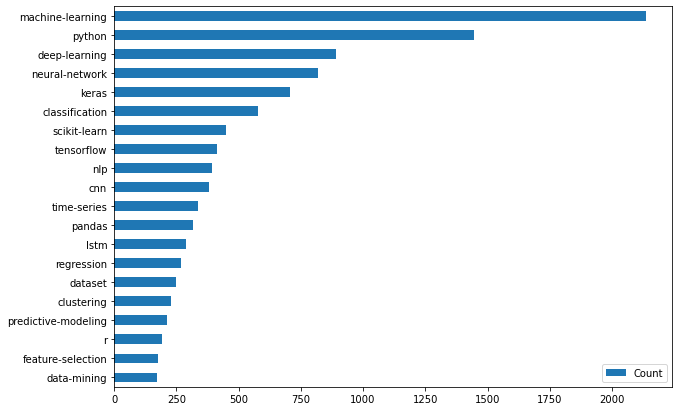

In [11]:
ax1 = most_used.plot.barh(y='Count',figsize=(10,7))

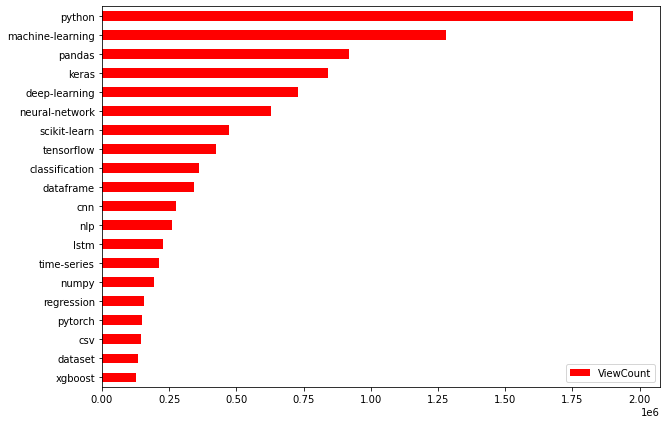

In [12]:
ax2 = most_viewed.plot.barh(y='ViewCount',figsize=(10,7),color={"red"})

By the plots, we can see **Python** and **Machine-learning** are both the top 2 of our proxies. Something interresting about **Pandas**, not too much tagged but in the views it's the 3 third one . We can add that the tags **deep-learning, keras, neural-network** have too a good popularity.

## Relations Between Tags
Looking at the plots, we see that most tops tags are present in both dataframes.Let's figure out what tags are in *most_used* but not in *most_viewed* and vice versa. we can identify them by the missing values.

In [13]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
print(in_used)

                     Count  ViewCount
data-mining            173        NaN
feature-selection      175        NaN
r                      193        NaN
predictive-modeling    213        NaN
clustering             229        NaN
dataset                250   132478.0
regression             270   155078.0
lstm                   290   228411.0
pandas                 315   918341.0
time-series            337   211704.0
cnn                    379   275472.0
nlp                    393   262273.0
tensorflow             413   425743.0
scikit-learn           448   472679.0
classification         579   361102.0
keras                  706   842566.0
neural-network         820   629118.0
deep-learning          890   730775.0
python                1447  1976512.0
machine-learning      2135  1280881.0


The tags present in most_used and not present in most_viewed are:
- data-mining
- feature-selection
- r
- predictive-modeling
- clustering

In [14]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
print(in_viewed)

                   Count  ViewCount
xgboost              NaN     126662
dataset            250.0     132478
csv                  NaN     143968
pytorch              NaN     148515
regression         270.0     155078
numpy                NaN     192945
time-series        337.0     211704
lstm               290.0     228411
nlp                393.0     262273
cnn                379.0     275472
dataframe            NaN     344179
classification     579.0     361102
tensorflow         413.0     425743
scikit-learn       448.0     472679
neural-network     820.0     629118
deep-learning      890.0     730775
keras              706.0     842566
pandas             315.0     918341
machine-learning  2135.0    1280881
python            1447.0    1976512


The tags present in *most_viewed* and not present in *most_used* are:
- xgboost
- csv
- pytorch
- dataframe

On this way, we can uderstand there is some relations between the tags. To know that we should count how many times each pair appears together.

In [15]:
# Create a list of all tags
tags = list(tagUsed.index)

With this list of all tags we're going to create a new dataframe where each row and column will represent a tag. Something like this:
![differents type](tagsDF.png)

In [16]:
associations = pd.DataFrame(index=tags, columns=tags)
associations.iloc[0:4,0:4]

,natural-language-process,tensorflow,lstm,training
natural-language-process,NaN,NaN,NaN,NaN
tensorflow,NaN,NaN,NaN,NaN
lstm,NaN,NaN,NaN,NaN
training,NaN,NaN,NaN,NaN


We'll now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [17]:
associations.fillna(0, inplace=True)
for tags in questions["Tags"]:
    associations.loc[tags,tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

In [18]:
relations_most_used = associations.loc[most_used.index,most_used.index]

#Put style a style to our table 
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["pandas","python"] = "background-color: yellow"
    helper_df.loc["python","pandas"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    return helper_df

relations_most_used.style.apply(style_cells,axis=None)

,data-mining,feature-selection,r,predictive-modeling,clustering,dataset,regression,lstm,pandas,time-series,cnn,nlp,tensorflow,scikit-learn,classification,keras,neural-network,deep-learning,python,machine-learning
data-mining,173,13,8,23,1,22,3,1,8,6,2,6,0,2,18,1,4,20,22,85
feature-selection,13,175,5,16,3,4,10,1,2,6,1,4,0,19,17,1,7,18,23,81
r,8,5,193,11,16,5,7,3,1,18,1,2,1,1,8,8,6,4,19,48
predictive-modeling,23,16,11,213,0,5,23,7,4,24,5,0,3,11,24,9,8,23,30,100
clustering,1,3,16,0,229,5,1,3,5,19,0,9,0,22,10,0,4,2,41,52
dataset,22,4,5,5,5,250,4,5,9,3,8,10,7,6,21,8,17,21,41,79
regression,3,10,7,23,1,4,270,10,6,19,4,2,6,33,29,25,40,19,51,100
lstm,1,1,3,7,3,5,10,290,6,60,18,16,26,1,13,97,49,71,43,43
pandas,8,2,1,4,5,9,6,6,315,16,1,3,2,31,3,2,1,1,218,57
time-series,6,6,18,24,19,3,19,60,16,337,7,0,7,7,19,34,25,30,77,106


The cells highlighted in yellow tell us that time-series was used together with r *218 times*. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used *2135 times* and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

<AxesSubplot:>

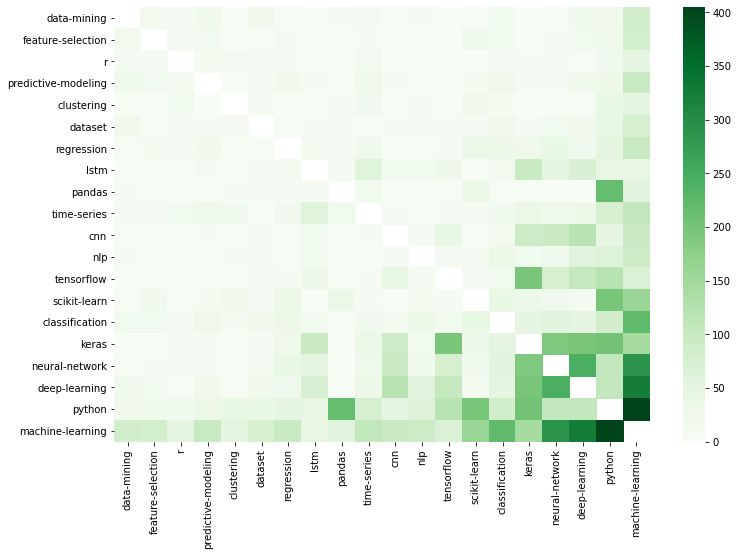

In [19]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

#print(relations_most_used)
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.


## Enter Domain Knowledge
In our proxies, we noticed that the most used tags are also the most viewed. In the top 10 tags, we've this common tags: 
   - machine-learning
   - python
   - deep-learning
   - neural-network
   - keras
   - classification
   - scikit-learn
   - tensorflow

**TensorFlow, Keras and Scikit Learn** are both of them python libraries in the domain of **Deep Learning** (related to **Neural Network**). 
**Deep Learning** it's a new area of **Machine Learning** and mainly use **Neural Network**

## Just a Fad
Through the above, we can understand **Deep-Learning** is the central theme so a Python content in the domain of deep-learning will be a good idea but one things comes to mind "Is deep learning just a fad". 
Let's find out additional proof to solidify our suggestion because we should create the most useful for as long as possible.
First, we'll get all the question ever asked on DSSE:

![all questions](all_questions.png)

Second, we'll track the interest in deep learing across time. We'll:
- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

In [20]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$","", regex=True).str.split("><")
all_questions.head(20)

,Id,CreationDate,Tags
0,2627,2014-12-06 00:41:24,"[javascript, visualization]"
1,2628,2014-12-06 01:10:30,[logistic-regression]
2,2629,2014-12-06 06:53:14,"[bigdata, definitions]"
3,2631,2014-12-06 15:04:03,"[machine-learning, data-mining, clustering, an..."
4,2632,2014-12-06 17:56:53,"[efficiency, map-reduce, performance, experime..."
5,2633,2014-12-07 04:40:53,"[bigdata, apache-hadoop, nosql, aws]"
6,2634,2014-12-07 10:43:01,"[machine-learning, regression, online-learning]"
7,2642,2014-12-07 16:24:43,"[machine-learning, algorithms]"
8,2643,2014-12-07 16:31:57,"[bigdata, apache-hadoop, scala]"
9,2645,2014-12-08 10:47:52,"[machine-learning, data-mining, clustering]"


Now, we'll extract all questions that have relation with deep-learning. Our classifier will be a list of tags and all questions that have at least one element of this list in his *Tags column*, will be judge as a deep-learning question. From the tags in most_used we made the list : deep-learning, neural-network, keras, scikit-learn, tensorflow, cnn, lstm .You can see the tags description [here]('https://datascience.stackexchange.com/tags') 

In [21]:
dl_list = ["deep-learning", "neural-network", "keras", "scikit-learn", "tensorflow", "cnn", "lstm"]

def deep_learning(tags):
    for tag in tags:
        if tag in dl_list:
            return 1 
    return 0 

all_questions['DP'] = all_questions["Tags"].apply(deep_learning)
all_questions.sample(20)

,Id,CreationDate,Tags,DP
11522,78344,2020-07-26 19:22:06,"[accuracy, explainable-ai]",0
6423,19523,2017-06-07 07:39:26,"[machine-learning, python, r, recommender-system]",0
22384,76174,2020-06-17 15:07:56,"[time-series, forecasting, forecast, arima]",0
21871,45443,2019-02-12 11:36:15,"[python, scikit-learn, random-forest]",1
4161,40147,2018-10-24 11:57:27,"[machine-learning, deep-learning, reinforcemen...",1
3317,71779,2020-04-05 15:04:19,"[correlation, distribution, pearsons-correlati...",0
8265,73391,2020-05-01 23:05:42,"[machine-learning, logistic-regression, machin...",0
14041,37806,2018-09-04 20:13:19,"[machine-learning, neural-network, logistic-re...",1
25641,88929,2021-02-04 16:20:08,"[machine-learning, regression, lasso]",0
24742,77024,2020-07-02 16:14:03,"[python, logistic-regression]",0


Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.
Since we don't have all the data for the first quarter of 2021, we'll get rid of those dates:

In [22]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2021]

Let's create a column that identifies the quarter in which a question was asked.

In [23]:
def fetch_quater(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1)//3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quater)
all_questions.sample(5)

,Id,CreationDate,Tags,DP,Quarter
9851,32480,2018-06-01 02:33:57,"[machine-learning, reinforcement-learning]",0,18Q2
8544,64007,2019-11-29 18:41:04,"[keras, tensorflow, backpropagation, evolution...",1,19Q4
21276,66594,2020-01-16 16:03:43,"[machine-learning, deep-learning, keras, lstm,...",1,20Q1
14578,1015,2014-08-21 06:31:50,[tools],0,14Q3
12853,27726,2018-02-12 13:31:46,"[machine-learning, nlp, clustering]",0,18Q1


We'll group our dataset by quarter and reply to the questions above.

In [24]:
quaterly = all_questions.groupby('Quarter').agg({"DP":['sum','size']})
#Rename the columns
quaterly.columns = ['QuestionDP','QuestionTotal']
quaterly["Rate"] = (quaterly["QuestionDP"]/quaterly["QuestionTotal"])*100
# re-index the table for the visualization
quaterly.reset_index(inplace = True)
quaterly.sample(20)

,Quarter,QuestionDP,QuestionTotal,Rate
6,15Q4,66,380,17.368421
11,17Q1,243,690,35.217391
3,15Q1,17,188,9.042553
17,18Q3,669,1461,45.790554
16,18Q2,567,1425,39.789474
13,17Q3,246,707,34.794908
8,16Q2,109,511,21.330724
22,19Q4,588,1506,39.043825
1,14Q3,13,188,6.914894
20,19Q2,671,1792,37.444196


Let's visualize our result.

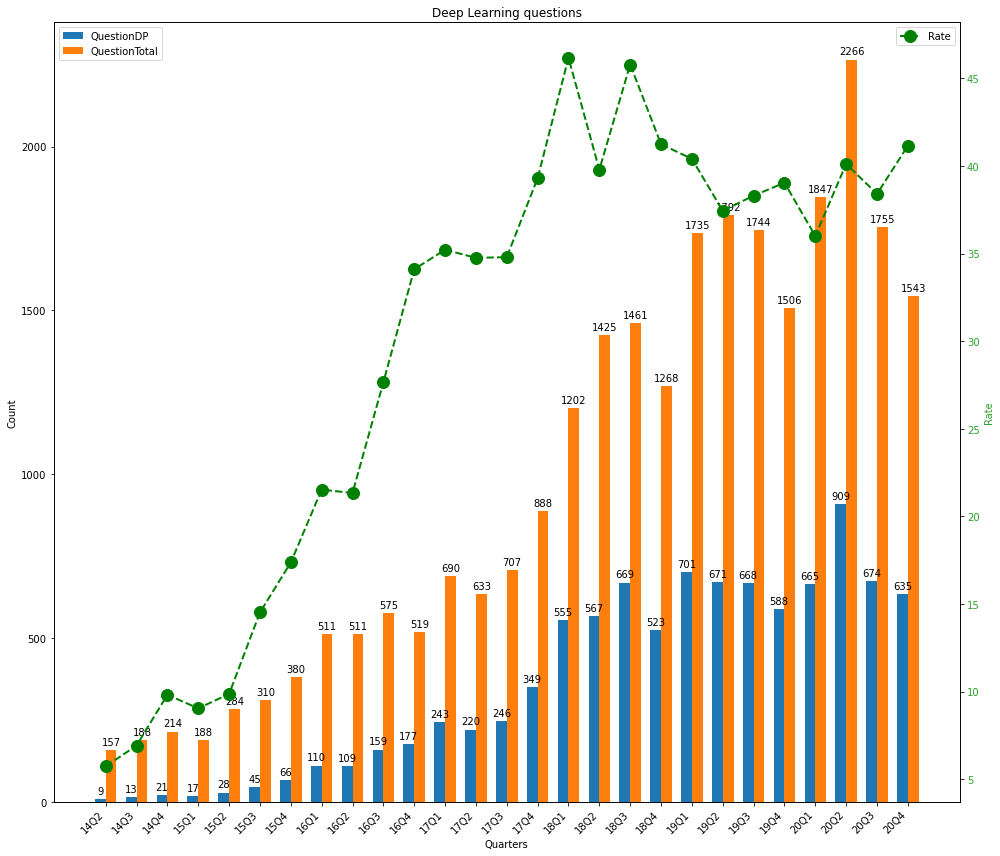

In [25]:
labels = quaterly["Quarter"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,12))

rects1 = ax.bar(x - width/2, quaterly["QuestionDP"], width, label='QuestionDP')
rects2 = ax.bar(x + width/2, quaterly["QuestionTotal"], width, label='QuestionTotal')
ax.set_title('Deep Learning questions')
ax.set_xlabel('Quarters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Count')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
# Rotate the axis X
labs = ax.get_xticklabels()
plt.setp(labs,rotation=45, horizontalalignment='right')

ax_rate = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax_rate.set_ylabel('Rate', color=color)
ax_rate.plot(x,quaterly["Rate"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12, label="Rate")
ax_rate.tick_params(axis='y', labelcolor=color)

ax_rate.legend()
ax.legend()
fig.tight_layout()

plt.show()


We can see from *2014* to *2020* the questions about deep learning follow very well the wave of the questions on the platform. It have a good evolution in the time even if we see some decrease in a certain period of time. We keep the proposition of creating a content about deep learning. 